# Section 1.9 Exercise 8

In [3]:
library(MASS)
data(Rubber)
head(Rubber)

loss,hard,tens
372,45,162
206,55,233
175,61,232
154,66,231
136,71,231
112,71,237


## Part A

In [4]:
# part a, perform backwards model selection using hypothesis testing
loss.mod <- lm(loss ~ hard + tens, Rubber)
summary(loss.mod)


Call:
lm(formula = loss ~ hard + tens, data = Rubber)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.385 -14.608   3.816  19.755  65.981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 885.1611    61.7516  14.334 3.84e-14 ***
hard         -6.5708     0.5832 -11.267 1.03e-11 ***
tens         -1.3743     0.1943  -7.073 1.32e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36.49 on 27 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8284 
F-statistic:    71 on 2 and 27 DF,  p-value: 1.767e-11


**The full model is the final model, because the coefficients of all predictor variableshave a p-value of less than 0.05**

## Part B

In [13]:
# part b, model selection based on AIC
summary(step(loss.mod))
summary(step(lm(loss ~ hard, Rubber)))
summary(step(lm(loss ~ tens, Rubber)))

Start:  AIC=218.66
loss ~ hard + tens

       Df Sum of Sq    RSS    AIC
<none>               35950 218.66
- tens  1     66607 102556 248.11
- hard  1    169027 204977 268.88



Call:
lm(formula = loss ~ hard + tens, data = Rubber)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.385 -14.608   3.816  19.755  65.981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 885.1611    61.7516  14.334 3.84e-14 ***
hard         -6.5708     0.5832 -11.267 1.03e-11 ***
tens         -1.3743     0.1943  -7.073 1.32e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36.49 on 27 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8284 
F-statistic:    71 on 2 and 27 DF,  p-value: 1.767e-11


Start:  AIC=248.11
loss ~ hard

       Df Sum of Sq    RSS    AIC
<none>              102556 248.11
- hard  1    122455 225011 269.68



Call:
lm(formula = loss ~ hard, data = Rubber)

Residuals:
   Min     1Q Median     3Q    Max 
-86.15 -46.77 -19.49  54.27 111.49 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 550.4151    65.7867   8.367 4.22e-09 ***
hard         -5.3366     0.9229  -5.782 3.29e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.52 on 28 degrees of freedom
Multiple R-squared:  0.5442,	Adjusted R-squared:  0.5279 
F-statistic: 33.43 on 1 and 28 DF,  p-value: 3.294e-06


Start:  AIC=268.88
loss ~ tens

       Df Sum of Sq    RSS    AIC
<none>              204977 268.88
- tens  1     20035 225011 269.68



Call:
lm(formula = loss ~ tens, data = Rubber)

Residuals:
     Min       1Q   Median       3Q      Max 
-155.640  -59.919    2.795   61.221  183.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 305.2248    79.9962   3.815 0.000688 ***
tens         -0.7192     0.4347  -1.654 0.109232    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 85.56 on 28 degrees of freedom
Multiple R-squared:  0.08904,	Adjusted R-squared:  0.0565 
F-statistic: 2.737 on 1 and 28 DF,  p-value: 0.1092


**After performing model selection based on AIC, the most appropriate model is still the full model, given the fact that it has the lowest AIC value.**

## Part C

loss_pred,tens
366.83526,162
203.55082,233
165.50016,232
134.02032,231
101.16617,231
92.92030,237
45.07805,224
19.09546,219
257.92184,203
231.16639,189


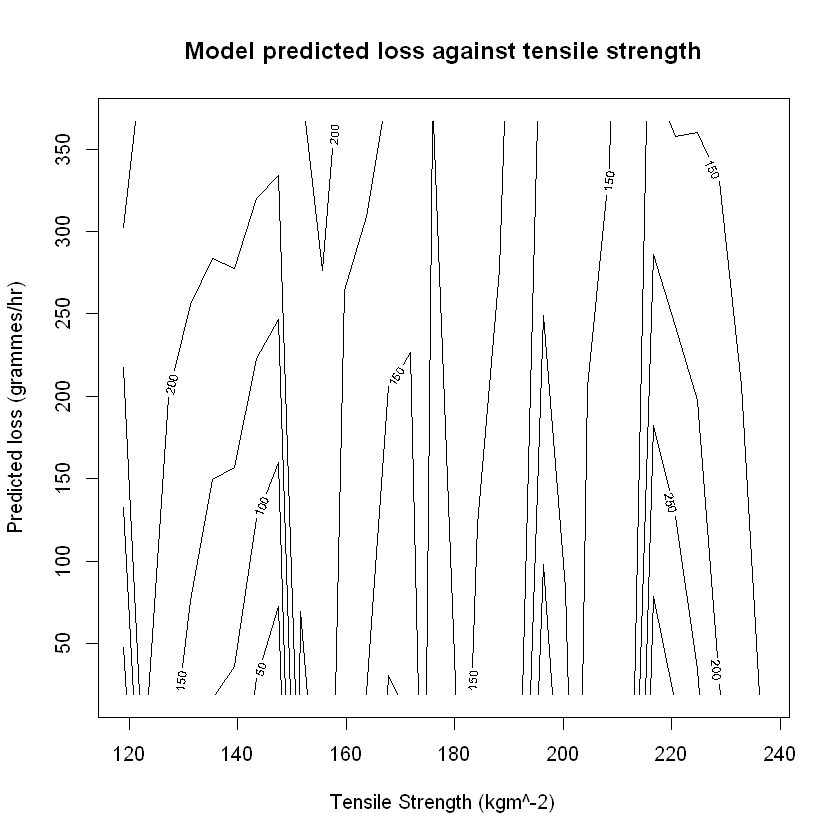

In [75]:
# part c, produce a contour plot of model predicted loss, against tens and hard
loss_pred <- predict(loss.mod)
loss_pred_df <- data.frame(loss_pred)
tens_df <- Rubber['tens']
df = data.frame(loss_pred_df, tens_df)
z <- data.matrix(df)
contour(x = seq(min(df['tens']), max(df['tens']), length.out = nrow(z)),
       y = seq(min(df['loss_pred']), max(df['loss_pred']), length.out = ncol(z)),
       z,
       main="Model predicted loss against tensile strength",
       xlab="Tensile Strength (kgm^-2)",
       ylab="Predicted loss (grammes/hr)")
df


loss_pred,hard
366.83526,45
203.55082,55
165.50016,61
134.02032,66
101.16617,71
92.92030,71
45.07805,81
19.09546,86
257.92184,53
231.16639,60


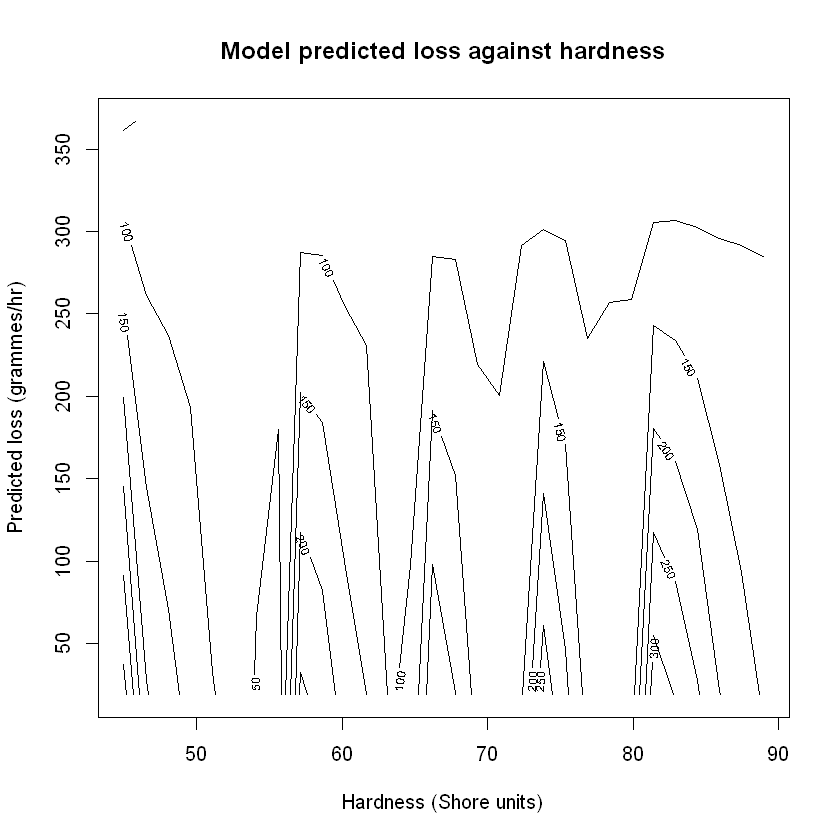

In [74]:
hard_df <- Rubber['hard']
df = data.frame(loss_pred_df, hard_df)
df = data.frame(loss_pred_df, hard_df)
z <- data.matrix(df)
contour(x = seq(min(df['hard']), max(df['hard']), length.out = nrow(z)),
       y = seq(min(df['loss_pred']), max(df['loss_pred']), length.out = ncol(z)),
       z,
       main="Model predicted loss against hardness",
       xlab="Hardness (Shore units)",
       ylab="Predicted loss (grammes/hr)")
df